In [1]:
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Доверительный интервал
__Зачем нужны доверительные интервалы__
- Точечная оценка не отражает всей картины, лишь готоворит об оценке полученной на опредленной выборке, но выборка может быть немного другой $\Rightarrow$ неопределенность, и чтобы понять в каком диапазоне она варьируется необходимо строить **доверительные интервалы** 
- Доверительный интервал показывает насколько мы уверены в точечной оценке (как наша оценка выглядит в худшем и в лучшем случае)
- Доверительные интервалы строятся для прогнозов
- Границы предсказательного интервала - константы, между ними лежит случайная величина
- Границы доверительного интервала  - случаные величины, внутри - константа

__Определение__
 - Интервал $[\theta_{L},\theta_{U}] $ называется __доверительным__ для параметра $\theta$ с уровнем значимости $1-\alpha$, если при бесконечном повторении эксперимента в $100*(1-\alpha)$ % случаев этот интервал будет покрывать истинное значение параметра $\theta$
 - $\alpha$ - уровень значимости
 - Если мы много раз измеряем скрепку то с вероятностью $1-\alpha$ наш доверительный интервал покрывает ее истинную длину 

# I) Асимптотические доверительные интервалы
 - ЦПТ позволяет строить дов интервал для любого среднего
 - Наблюдаем $X_{1}, ..., X_{n}$
    - iid
    - число наблюдений $n$ велико
    - нет выбросов
- Тогда
$$\frac{\overline{x} - \mu}{\sqrt{\frac{\sigma^2}{n}}} \overset{asy}{\sim} N(0, 1)$$

$P(\overline{x} -z_{1-\frac{\alpha}{2}}*\sqrt{\frac{\hat{\sigma}^2}{n}}
\leq
   \mu
\leq 
   \overline{x}+z_{1-\frac{\alpha}{2}}*\sqrt{\frac{\hat{\sigma}^2}{n}}) = 1 - \alpha
$

__Почему можно заменить $\hat{\sigma}$ на $\sigma$?__
- так как $\hat{\sigma}$ состоятельная оценка для $\sigma$ (сходится по вероятности)
- тогда можно домножить и получить искомый результат 
$$ \frac{\frac{\hat{\sigma}^2}{n}}{\frac{\sigma^2}{n}}* \frac{\overline{x} - \mu}{\sqrt{\frac{\hat{\sigma}^2}{n}}} \overset{d, \; при \; n \rightarrow \infty}{\sim} N(0, 1)$$

$$  \frac{\overline{x} - \mu}{\sqrt{\frac{\hat{\sigma}^2}{n}}} \overset{d, \;при\;  n \rightarrow \infty}{\sim} N(0, 1)$$

__Ассиптотический доверительный интервал для дисперсии__

$$s^2 = \frac{n}{n -1} * \hat{\sigma}^2 = \frac{n}{n -1} * (\overline{x^2} - \overline{x}^2)$$

$$s^2 \sim N(\sigma^2, \frac{\mu_{4} - \sigma^4}{n})$$ 
где $\mu_{4} = E[(X_{i} - \mu)^2]$

# II) Доверительные интервалы для маленькиз выборок

# Точные интервалы для нормальных выборок (маленькие выборки)
Используется 
 - если выборка маленька (n любое в общем случае)
 - если выборка точно взята из *нормального распределениия*
 

Для больших выборок можно пологать, что $\mu = \overline{x} \sim N(\mu, \frac{\sigma^2}{n})$, но для конечной маленькой выборки 
$\mu = \overline{x} \; not \:\sim N(\mu, \frac{s^2}{n})$


Факты: 
- Точные дов интервалы шире асимптотических (хвосты у распределения Стьюдента шире)
- Распределение Стьюдента сходится к нормальному при $n \rightarrow \infty$

Какие варианты могут быть (всего 4 штуки):

__Если необходимо построить доверительный интервал для  $\sigma$:__
- $\mu$ известна: 
- $\mu$ неизвестна:

__Если необходимо построить доверительный интервал для  $\mu$:__
- дисперсия известна: поступаем как обычно $z_{stats}$, получаются точные доверительные интервалы (например, ситуация, когда мы что- то измеряем и знаем ошибку прибора)
- дисперсия неизвестна: необходимо использовать $\chi_k^2$, $t_n$, $F_{n, k}$, теорема Фишера



## 1 союзник: $\chi^2$ распределение

Пусть $X_1, ..., X_k \sim iid \; N(0, 1)$, тогда $Y = X_1^2+ ...+ X_k^2 \sim \chi_k^2$

Из-за квадратов принимает только положительные значения

Распределение ХИ-квадрат применяется в различных методах математической статистики:
- при построении доверительных интервалов для дисперсии (**так как дисперсия это по сути сумма квадратов**);
- при проверке гипотез о дисперсии нормального распределения ;
- при проверке гипотез с помощью критерия согласия Пирсона (согласуются ли эмпирические данные с нашим предположением о теоретической функции распределения или нет, англ. Goodness-of-fit)
- при проверке гипотез с помощью критерия независимости хи-квадрат (используется для определения связи между двумя категориальными переменными, англ. Chi-square test of association).
$$E(X) = k$$
$$Var(X) =2k$$

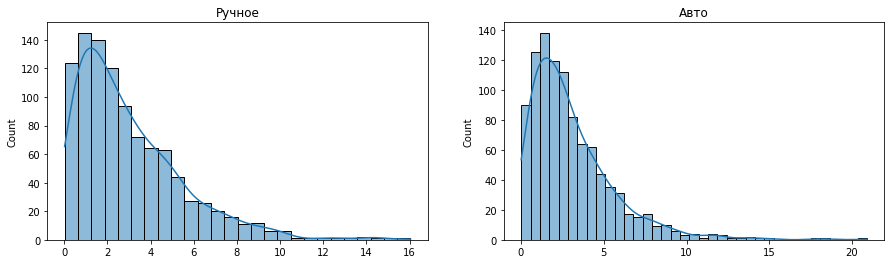

In [2]:
def plot_chi2_distribution(df = 1):
    '''
    Функция, которая возращвет два графика хи^2 распределения. Первый выведен по определению, второй - автоматически из библиотеки scipy

    Аргументы
    - df - кол-во степеней свободы
    '''
    print(f'Число степеней свободы {df}')
    # инициализация нормального и хи^2   распредлений
    chi = stats.chi2(df = df)
    norm = stats.norm(loc=0, scale=1)
    # выполнение преобразований над нормальный распределнием, чтобы получить хи^2
    data = [sum(map(lambda x: x**2, i)) for i in norm.rvs(size = (1000, df))]

    f, ax = plt.subplots(1, 2, figsize = (15, 4))
    sns.histplot(data, kde=True, ax=ax[0]).set_title('Ручное')
    sns.histplot(chi.rvs(1000), kde=True, ax=ax[1]).set_title('Авто')
plot_chi2_distribution(df = 3)


In [11]:
# привер расчета p-value
z = 1.96
p = 1 - (stats.norm.cdf(z) - stats.norm.cdf(-z))
print(f'p-value = {p:.2}')

p-value = 0.05


## 2 союзник: $t_{n}$ распределение

Пусть $ Y_{0}, Y_{1},\ldots ,Y_{n}$ — независимые стандартные нормальные случайные величины, такие что
 $Y_{i} \sim {\mathcal {N}}(0,1)$ Тогда распределение случайной величины 
 $$t =\frac {Y_{0}}{\sqrt {{\frac {1}{n}}\sum \limits _{i=1}^{n} Y_{i}^{2}}}$$
называется распределением Стьюдента с n степенями свободы $ t \sim \mathrm {t} (n)$

Число степеней свободы 30


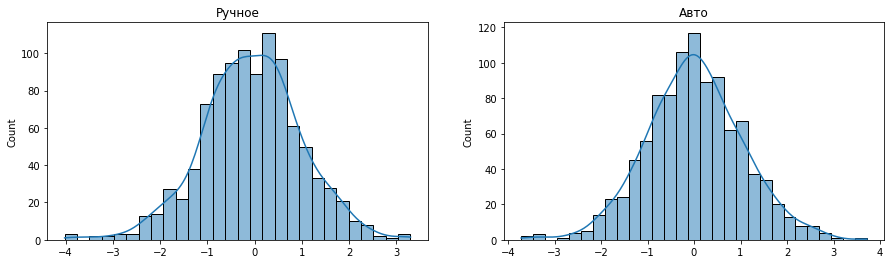

In [60]:
def plot_t_distribution(df = 1, size= 1000):
    '''
    Функция, которая возращвет два графика распределения Стьюдента.
     Первый выведен по определению, второй - автоматически из библиотеки scipy

    Аргументы
    - df - кол-во степеней свободы
    '''
    print(f'Число степеней свободы {df}')
    # инициализация нормального и t  распредлений
    t_dist = stats.t(df = df)
    norm = stats.norm(loc=0, scale=1)
    # выполнение преобразований над нормальный распределнием, чтобы получить t распределение
  
    
    data = [norm.rvs(1)[0] / (np.sqrt(sum(map(lambda x: x**2, i))/df)) for i in norm.rvs(size = (size, df))]

    f, ax = plt.subplots(1, 2, figsize = (15, 4))
    sns.histplot(data, kde=True, ax = ax[0]).set_title('Ручное')
    sns.histplot(t_dist.rvs(size), kde=True, ax=ax[1]).set_title('Авто')

plot_t_distribution(df = 30, size=1000)
